In [33]:
import pandas as pd
import numpy as np

In [34]:
# Importing dataset to be processed with pandas & displaying the top 10 result
dt = pd.read_csv('assignment1_dataset.csv', sep=',')
dt.head(10)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
5,-0.699867,0.019159,1.103377,-0.671614,-0.119063,-18.597563
6,-1.028250,0.962967,0.471027,-1.941219,-0.465591,-73.174734
7,0.337585,1.352948,-1.789795,-0.885796,-0.846150,-25.865464
8,0.295433,-0.907789,0.275980,-0.675526,-0.942592,-9.001596
9,0.442269,-0.704559,-1.127342,1.030206,0.800113,57.076963


In [35]:
# Displaying additional description
dt.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [36]:
# Make a correlation matrix between the columns/features and target in ascending order
corr_matrix = dt.corr()
corr_matrix['response'].sort_values(ascending=True)
# Correlation between f4 and response are the closest

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

Text(0.5, 1.0, 'relationship between f4 & response')

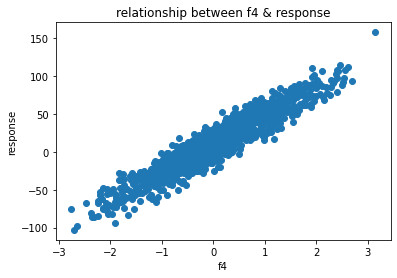

In [37]:
# let's plot f4 & response, cuz f4 corr value is close to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f4, dt.response)
plt.xlabel('f4')
plt.ylabel('response')
plt.title('relationship between f4 & response')

In [38]:
# Redefine each column to be processed
columns = ['f1','f2','f3','f4','f5','response']
dt = dt.loc[:, columns]
dt.head()

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [39]:
# Splitting the training and test set with the ratio of 8:2

from sklearn.model_selection import train_test_split
features = ['f1','f2','f3','f4','f5'] # Data that we want to utilize as training & test
#X_data = dt.loc[:, features] # X are the data we want to use from 'features' = independent variable
#y_data = dt.loc[:, ['response']] # y is the data we want to use as target = dependent variable

X_data = np.array(dt.iloc[:, 3])
y_data = np.array(dt.iloc[:, -1])

"""
X = dt[['f1','f2','f3','f4','f5']]
y = dt['response']
X_data = np.array(X)
y_data = np.array(y)
"""
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, train_size=0.8)

In [40]:
alpha = 0.15 # Set learning rate to 0.1
max_epoch = 1500 # Set max iteration to 1000

In [41]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800,) (800,)
(200,) (200,)


In [42]:
def loss_fn(y, yhat):
    loss = np.sum((y-yhat)**2)/len(y)
    return loss
    #loss = mean_squared_error(y, yhat)
    #return loss

In [43]:
def train_model(X, y, alpha, max_epoch):
    w = b = 0
    n = len(X)
    losses = []
    weights = []

    def prediction(w, X):
            yhat = (w * X) + b
            return yhat;

    for i in range(max_epoch):
        y_predict = prediction(w, X)
        loss = loss_fn(y, y_predict)

        losses.append(loss)
        weights.append(w)

        loss_fn(y, y_predict)

        wd = -(2/n)*sum(X*(y-y_predict))
        bd = -(2/n)*sum(y-y_predict)

        w = w - alpha * wd
        b = b - alpha * bd

        print(f"Iteration {i+1}: Loss {loss}, Weight {w}, Bias {b}");
    plt.figure(figsize=(8,6))
    plt.plot(weights, losses)
    plt.scatter(weights, losses, marker='o', color='red')
    plt.title("Loss vs Weights")
    plt.ylabel("Loss")
    plt.xlabel("Weight")
    plt.show()

    return w, b

Iteration 1: Loss 1721.3069867699319, Weight 11.696102077957205, Bias 3.669599330511377
Iteration 2: Loss 880.8238696125039, Weight 19.679364962567043, Bias 5.987867267407561
Iteration 3: Loss 494.1386394965996, Weight 25.13239378048727, Bias 7.43970719426145
Iteration 4: Loss 315.8860583169484, Weight 28.859946351231205, Bias 8.339228056640865
Iteration 5: Loss 233.539957145164, Weight 31.40999672721068, Bias 8.889073633543482
Iteration 6: Loss 195.4104133768699, Weight 33.15591093800564, Bias 9.219360663173202
Iteration 7: Loss 177.7102979496032, Weight 34.35225495610511, Bias 9.413175880970186
Iteration 8: Loss 169.47134217695225, Weight 35.17271580655756, Bias 9.523228916134661
Iteration 9: Loss 165.62511199497047, Weight 35.73588308015578, Bias 9.582697304873543
Iteration 10: Loss 163.82396516109745, Weight 36.12278728137225, Bias 9.612265933605121
Iteration 11: Loss 162.97772420092355, Weight 36.38883785102429, Bias 9.624679096118454
Iteration 12: Loss 162.57874964772344, Weight 

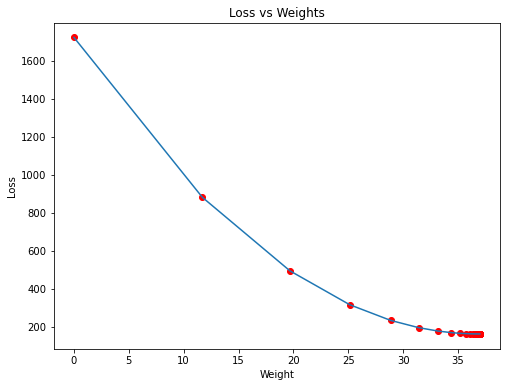

Estimated Weight: 36.98038182456282
Estimated Bias: 9.592430178520882


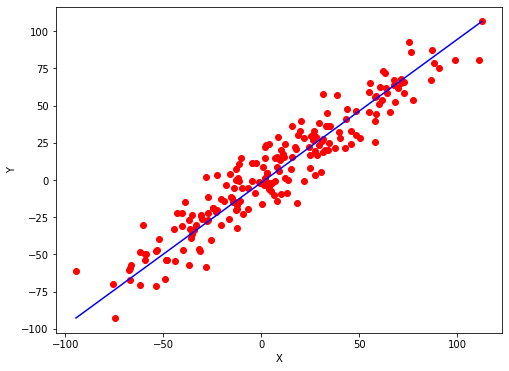

In [44]:
est_weight, est_bias = train_model(X_train, y_train, alpha, max_epoch)
print(f"Estimated Weight: {est_weight}\nEstimated Bias: {est_bias}")
y_pred = (est_weight*X_test) + est_bias
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred, marker='o', color='red')

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='blue', label="line1")
#plt.plot(y_test, y_test, color='orange', label="line2", linestyle="--")

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10.593441909037288
173.2860954934168
0.8978521452417096


In [46]:
X_data

array([-0.05011893, -0.65406671,  1.33977899, -0.6476337 , -0.09072538,
       -0.67161437, -1.94121883, -0.88579565, -0.67552575,  1.0302058 ,
       -0.02699786,  1.15802548, -1.08282817,  0.82975141, -0.33147203,
        0.91027829, -1.56336414, -0.62343509, -1.48133953,  0.98156963,
       -0.79753067,  1.24923471,  2.40415379,  0.50728827, -0.02855451,
        1.32388265, -0.9804446 ,  0.35720381, -1.04077017, -0.33772038,
        1.20249973,  0.90063358,  0.68769806,  0.74902782,  1.84003162,
        1.22227647, -0.75886596,  0.15359862, -1.32772018, -0.27912728,
       -0.69417972, -0.44222109,  0.59152436,  1.00172426, -1.13213405,
        0.2077216 , -0.39042125, -0.09406684,  0.06301996, -0.05654816,
        2.39979023, -0.69548917,  0.67978004, -0.42874012, -0.8588812 ,
       -1.08518756,  0.33045577,  1.24238479, -0.56821753, -0.63905589,
       -1.89271951,  1.35837615, -0.68461437, -0.96451243, -0.12612626,
        1.55840307, -1.15611449,  1.55718631,  0.3000472 ,  0.15

In [47]:
y_data

array([ 6.24251354e+00, -8.11824067e+00,  6.67224555e+01, -2.77167931e+01,
        8.19207453e+00, -1.85975634e+01, -7.31747338e+01, -2.58654640e+01,
       -9.00159641e+00,  5.70769631e+01,  8.25614691e+00,  3.60951293e+01,
       -4.37178955e+01,  2.68389768e+01,  2.83097144e+00,  5.13804145e+01,
       -5.87649462e+01, -3.97432142e+01, -4.81891618e+01,  2.01022126e+01,
       -3.43441494e+01,  5.84652563e+01,  1.07747983e+02,  4.00757628e+01,
       -1.46175832e+01,  7.28422887e+01, -9.01460749e+00,  2.91140591e+01,
       -5.05497422e+01, -1.01154895e+01,  7.74266254e+01,  5.05943222e+01,
        2.10375993e+01,  3.67073169e+01,  7.37582445e+01,  5.33909442e+01,
       -1.80094381e+00,  1.40192079e+01, -3.25767518e+01, -1.12872425e+01,
        3.49864024e+00, -1.25020675e+01,  1.84473688e+01,  4.23759296e+01,
       -1.24324684e+01,  2.57110278e+01,  1.84618719e+00, -9.57440231e+00,
       -1.14633584e+01,  3.61486031e+00,  9.81116238e+01, -8.79652015e+00,
        4.79232433e+01, -